<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/ISBN978-4-7981-6720-6/list9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 9 変分オートエンコーダ（VAE）

* 9.1 VAEの概要
* 9.2 VAEの仕組み
* 9.3 オートエンコーダの実装

### リスト 9.1 訓練用データを用意する

(60000, 28, 28) (10000, 28, 28)


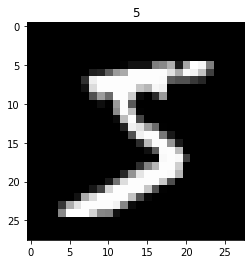

訓練用データの形状: (60000, 784) テスト用データの形状: (10000, 784)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

# 各ピクセルの値を0-1の範囲に収める
x_train = x_train / 255
x_test = x_test / 255

# 手書き文字画像を1つ表示
plt.imshow(x_train[0].reshape(28, 28), cmap="gray")
plt.title(t_train[0])
plt.show()

# 1次元に変換する
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print("訓練用データの形状:", x_train.shape, "テスト用データの形状:", x_test.shape)

### リスト 9.2 オートエンコーダの各設定

In [2]:
epochs = 20
batch_size = 128
n_in_out = 784
n_mid = 64

### リスト 9.3 オートエンコーダのモデルの構築

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# 各層
x = Input(shape=(n_in_out,))
encoder = Dense(n_mid, activation="relu")
decoder = Dense(n_in_out, activation="sigmoid")

# ネットワーク
h = encoder(x)
y = decoder(h)

# オートエンコーダのモデル
model_autoencoder = Model(x, y)
model_autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
model_autoencoder.summary()
print()

# Encoderのみのモデル
model_encoder = Model(x, h)
model_encoder.summary()
print

# Decoderのみのモデル
input_decoder = Input(shape=(n_mid,))
model_decoder = Model(input_decoder, decoder(input_decoder))
model_decoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 6

### リスト 9.4 オートエンコーダの学習

In [4]:
model_autoencoder.fit(x_train, x_train,
                      shuffle=True,
                      epochs=epochs,
                      batch_size=batch_size,
                      validation_data=(x_test, x_test))

Epoch 1/20
469/469 [==============================] - 8s 14ms/step - loss: 0.1996 - val_loss: 0.1334
Epoch 2/20
469/469 [==============================] - 6s 14ms/step - loss: 0.1171 - val_loss: 0.1025
Epoch 3/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0963 - val_loss: 0.0890
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0862 - val_loss: 0.0819
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0808 - val_loss: 0.0782
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0780 - val_loss: 0.0764
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0764 - val_loss: 0.0752
Epoch 8/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0755 - val_loss: 0.0744
Epoch 9/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0749 - val_loss: 0.0740
Epoch 10/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0745 - val_lo

### リスト 9.5 オートエンコーダによる画像生成

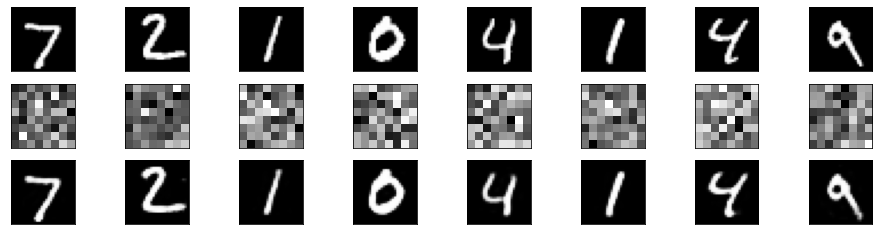

In [5]:
encoded = model_encoder.predict(x_test)
decoded = model_decoder.predict(encoded)

n = 8
plt.figure(figsize=(16, 4))
for i in range(n):
  # 入力画像
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap="Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # 中間層の出力
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded[i].reshape(8, 8), cmap="Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # 出力画像
  ax = plt.subplot(3, n, i + 1 + 2 * n)
  plt.imshow(decoded[i].reshape(28, 28), cmap="Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()